## Modelo Futuros índice Bitcoin e Dolar Americano

<a href="https://br.financas.yahoo.com/quote/BTC-USD/history?period1=1577836800&period2=1627862400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true">Link do índice</a>

* **Date**: Data das operações na bolsa (diária)
* **Close**: Valor de Fechamento (no dia)
* **Close Adj**: Valor de Fechamento Ajustado (no dia)
* **Open**: Valor da Abertura (no dia)
* **High**: Valor máximo (no dia)
* **Low**: Valor mínimo (no dia)
* **Volume**: Volume de contratos negociados (no dia)

In [1]:
### Bibliotecas
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import plotly.graph_objects as go 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carregando os dados

Vamos começar lendo o arquivo FuturosMiniBovespa.csv em um dataframe do pandas, mas antes vamos dar uma olhadinha no gráfico de variação do último mês do índice Ibovespa.

In [2]:
DataSet=pd.read_csv('BTC-USD.csv')

In [3]:
fig = go.Figure(
      data=[go.Candlestick(x=DataSet['Date'], open=DataSet['Open'], high=DataSet['High'], low=DataSet['Low'], close=DataSet['Close'])]
      )

fig.update_layout(xaxis_rangeslider_visible=False)  
fig.show()

### Agora vamos ler o arquivo do período desejável 

In [4]:
DataSet=DataSet.dropna()
DataSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10


In [5]:
DataSet.describe()

,Open,High,Low,Close,Adj Close,Volume
count,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,23328.037778,24017.859309,22565.092976,23380.747281,23380.747281,4.092136e+10
std,17481.683132,18049.325910,16790.312679,17480.273500,17480.273500,2.284989e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,1.225260e+10
25%,9345.520508,9499.036133,9248.006836,9354.559570,9354.559570,2.560521e+10
50%,11913.077148,12150.994141,11768.697266,11970.478516,11970.478516,3.650685e+10
75%,35881.457032,37604.328125,34473.779297,35968.791016,35968.791016,5.095648e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


### Inicialmente iremos criar uma RNN baseada apenas no Valor de Abertura

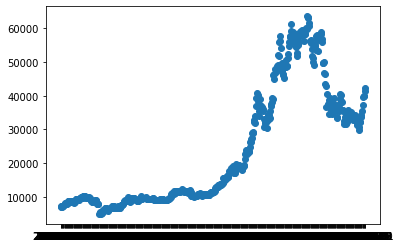

In [6]:
plt.scatter(DataSet['Date'],DataSet['Open'],)
plt.show()

size_df = DataSet.shape[0]
size_df_teste = 20
size_df_treino = size_df - size_df_teste

base_treinamento = DataSet.iloc[:size_df_treino]
base_teste = DataSet.iloc[size_df_treino+1:]
#DataSet.drop(['Date','Close','High','Low', 'Volume'],axis=1,inplace=True)

In [7]:
base_treinamento = base_treinamento.iloc[:, 1:2].values
base_treinamento

array([[ 7194.89209 ],
       [ 7202.55127 ],
       [ 6984.428711],
       [ 7345.375488],
       [ 7410.45166 ],
       [ 7410.452148],
       [ 7768.682129],
       [ 8161.935547],
       [ 8082.295898],
       [ 7878.307617],
       [ 8162.190918],
       [ 8033.261719],
       [ 8189.771973],
       [ 8140.933105],
       [ 8825.34375 ],
       [ 8812.481445],
       [ 8725.209961],
       [ 8927.211914],
       [ 8941.445313],
       [ 8704.631836],
       [ 8658.991211],
       [ 8744.210938],
       [ 8680.650391],
       [ 8405.567383],
       [ 8440.119141],
       [ 8364.410156],
       [ 8597.308594],
       [ 8912.524414],
       [ 9357.470703],
       [ 9316.016602],
       [ 9508.313477],
       [ 9346.357422],
       [ 9389.820313],
       [ 9344.683594],
       [ 9292.841797],
       [ 9183.416016],
       [ 9617.821289],
       [ 9726.00293 ],
       [ 9793.070313],
       [ 9863.894531],
       [10115.55957 ],
       [ 9855.891602],
       [10202.387695],
       [103

### Normalizar os dados do Mini Índice

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
DataScaled=scaler.fit_transform(base_treinamento)
DataScaled

array([[3.74618920e-02],
       [3.75927707e-02],
       [3.38655292e-02],
       [4.00333269e-02],
       [4.11453376e-02],
       [4.11453460e-02],
       [4.72667196e-02],
       [5.39865678e-02],
       [5.26256989e-02],
       [4.91399814e-02],
       [5.39909315e-02],
       [5.17878111e-02],
       [5.44622319e-02],
       [5.36276816e-02],
       [6.53227755e-02],
       [6.51029866e-02],
       [6.36117061e-02],
       [6.70634815e-02],
       [6.73066994e-02],
       [6.32600706e-02],
       [6.24801713e-02],
       [6.39363916e-02],
       [6.28502797e-02],
       [5.81497076e-02],
       [5.87401222e-02],
       [5.74464198e-02],
       [6.14261491e-02],
       [6.68125040e-02],
       [7.44156712e-02],
       [7.37073105e-02],
       [7.69932472e-02],
       [7.42257694e-02],
       [7.49684559e-02],
       [7.41971673e-02],
       [7.33113034e-02],
       [7.14414541e-02],
       [7.88644982e-02],
       [8.07130879e-02],
       [8.18591241e-02],
       [8.30693564e-02],


### Definição dos previsores

In [17]:
previsores = []
preco_real = []
NRecursao = 90
DataSetLen = len(DataScaled)
print(DataSetLen)

555


In [18]:
for i in range(NRecursao, DataSetLen):
    previsores.append(DataScaled[i-NRecursao:i,0])
    preco_real.append(DataScaled[i,0])

previsores, preco_real = np.array(previsores), np.array(preco_real)
previsores.shape

(465, 90)

### Tranformar para o formato do Tensor do Keras


In [35]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(465, 90, 1)

### Estrutura da Rede Neural

In [57]:
# Camada de entrada
regressor = Sequential()
regressor.add(LSTM(units = 400, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

# Cada Oculta 1
regressor.add(LSTM(units = 300, return_sequences = True))
regressor.add(Dropout(0.3))

# Cada Oculta 1
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.3))

# Cada Oculta 2
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.3))

# Cada Oculta 3
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.3))

# Camada de Saída
regressor.add(Dense(units = 1, activation = 'linear'))


### Construindo a Rede

In [58]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 50, batch_size = 32)

### Conjunto de dados para o Teste

In [ ]:
preco_real_teste = base_teste.iloc[:, 1:2].values

base_completa = pd.concat((DataSet['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - NRecursao:].values

entradas = entradas.reshape(-1, 1)
entradas = scaler.transform(entradas)

In [ ]:
DataSetTestLen = len(base_teste)
NPredictions = 90

X_teste = []
for i in range(NRecursao, DataSetTestLen+NRecursao):
    X_teste.append(entradas[i-NRecursao:i, 0])
    
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

previsoes = regressor.predict(X_teste)
previsoes = scaler.inverse_transform(previsoes)


In [ ]:
RNN=[]
predictions_teste=X_teste[0].T
predictions_teste=np.reshape(predictions_teste, (predictions_teste.shape[0], predictions_teste.shape[1], 1))

predictions_teste[0][NRecursao-1][0]=regressor.predict(predictions_teste)[0][0]
RNN.append(regressor.predict(predictions_teste)[0])

for i in range(NPredictions-1):
    predictions_teste=np.roll(predictions_teste,-1)
    predictions_teste[0][NRecursao-1][0]=regressor.predict(predictions_teste)[0][0]
    RNN.append(regressor.predict(predictions_teste)[0])
RNN = scaler.inverse_transform(RNN)

print(RNN.mean())
print(previsoes.mean())
print(preco_real_teste.mean())

27010.195979087825
31913.006
34785.854852


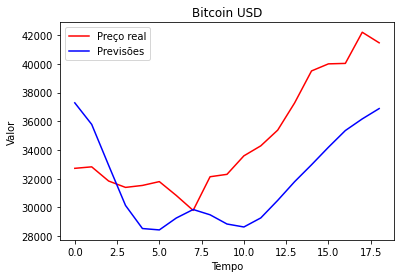

In [ ]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
#plt.plot(RNN, color = 'green', label = 'RNN')

plt.title('Bitcoin USD')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
np.shape(previsoes)

(19, 1)